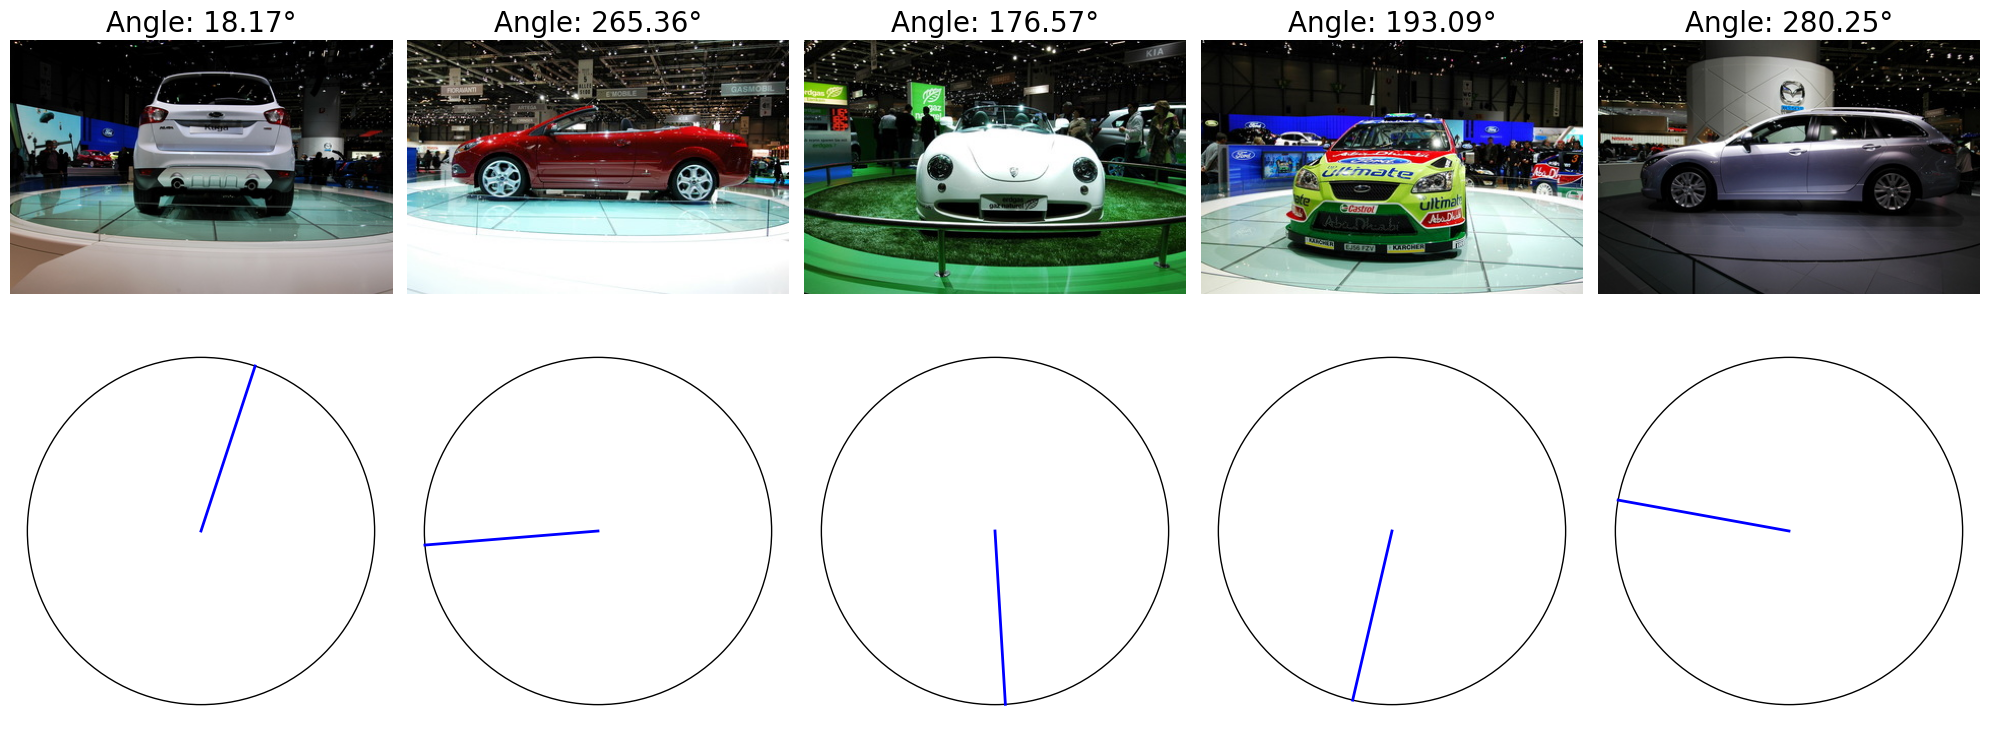

In [35]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#This cell is for you to select the specific car and image

# Helper function to parse the tripod sequence file and return needed info
def parse_tripod_seq_info(base_path):
    # Path to the tripod-seq.txt file
    file_path = os.path.join(base_path, 'tripod-seq.txt')
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
        num_frames_360 = list(map(int, lines[4].split()))
        frontal_frames = list(map(int, lines[5].split()))
        rotation_sense = list(map(int, lines[6].split()))
    return num_frames_360, frontal_frames, rotation_sense

# Function to calculate the angle for a given frame
def calculate_angle(frame_id, sequence_id, num_frames_360, frontal_frames, rotation_sense):
    relative_position = (frame_id - frontal_frames[sequence_id - 1]) % num_frames_360[sequence_id - 1]
    raw_angle = relative_position * (360 / num_frames_360[sequence_id - 1]) * rotation_sense[sequence_id - 1]
    # Standardize angle so 0 points downwards and increase it counterclockwise
    standardized_angle = (raw_angle + 180) % 360
    return standardized_angle

# Function to plot a circle with a line representing the angle
def plot_angle_circle(angle_degrees, ax):
    # Adjust the angle so that 0 points straight up and the circle goes clockwise
    adjusted_angle = (-angle_degrees + 90) % 360

    # Create a smaller circle
    circle = plt.Circle((0.5, 0.5), 0.3, color='black', fill=False)
    # Calculate the coordinates of the line's end
    angle_radians = np.deg2rad(adjusted_angle)
    line_x = 0.5 + 0.3 * np.cos(angle_radians)
    line_y = 0.5 + 0.3 * np.sin(angle_radians)
    # Plot the circle and the line
    ax.add_patch(circle)
    ax.plot([0.5, line_x], [0.5, line_y], color='blue', lw=2)  # lw is the line width
    ax.set_aspect('equal')
    ax.axis('off')


def plot_cars_with_angles(base_path, sequence_ids, frame_ids):
    num_frames_360, frontal_frames, rotation_sense = parse_tripod_seq_info(base_path)
    
    # Create a figure with 1 row and 5 columns
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # Adjust figsize as needed
    
    for i, (sequence_id, frame_id) in enumerate(zip(sequence_ids, frame_ids)):
        angle = calculate_angle(frame_id, sequence_id, num_frames_360, frontal_frames, rotation_sense)
        
        img_path = os.path.join(base_path, f'tripod_seq_{sequence_id:02d}_{frame_id:03d}.jpg')
        img = Image.open(img_path)
        
        # Plot the image in the first row
        axs[0, i].imshow(img)
        axs[0, i].set_title(f'Angle: {angle:.2f}°', fontsize=20)  # Larger font size for the angle
        axs[0, i].axis('off')  # Hide the axes on the image plot
        
        # Plot the angle circle in the second row
        plot_angle_circle(angle, axs[1, i])
    
    plt.tight_layout()
    plt.show()

# Define base path and sequence/frame IDs for 5 cars
base_path = './data/epfl-gims08/tripod-seq'
sequence_ids = [1, 2, 3, 4, 5]  # Example sequence IDs for 5 cars
frame_ids = [1, 1, 1, 1, 1]     # Example corresponding frame IDs for 5 cars

# Call the function with your base path, sequence IDs, and frame IDs for 5 cars
plot_cars_with_angles(base_path, sequence_ids, frame_ids)


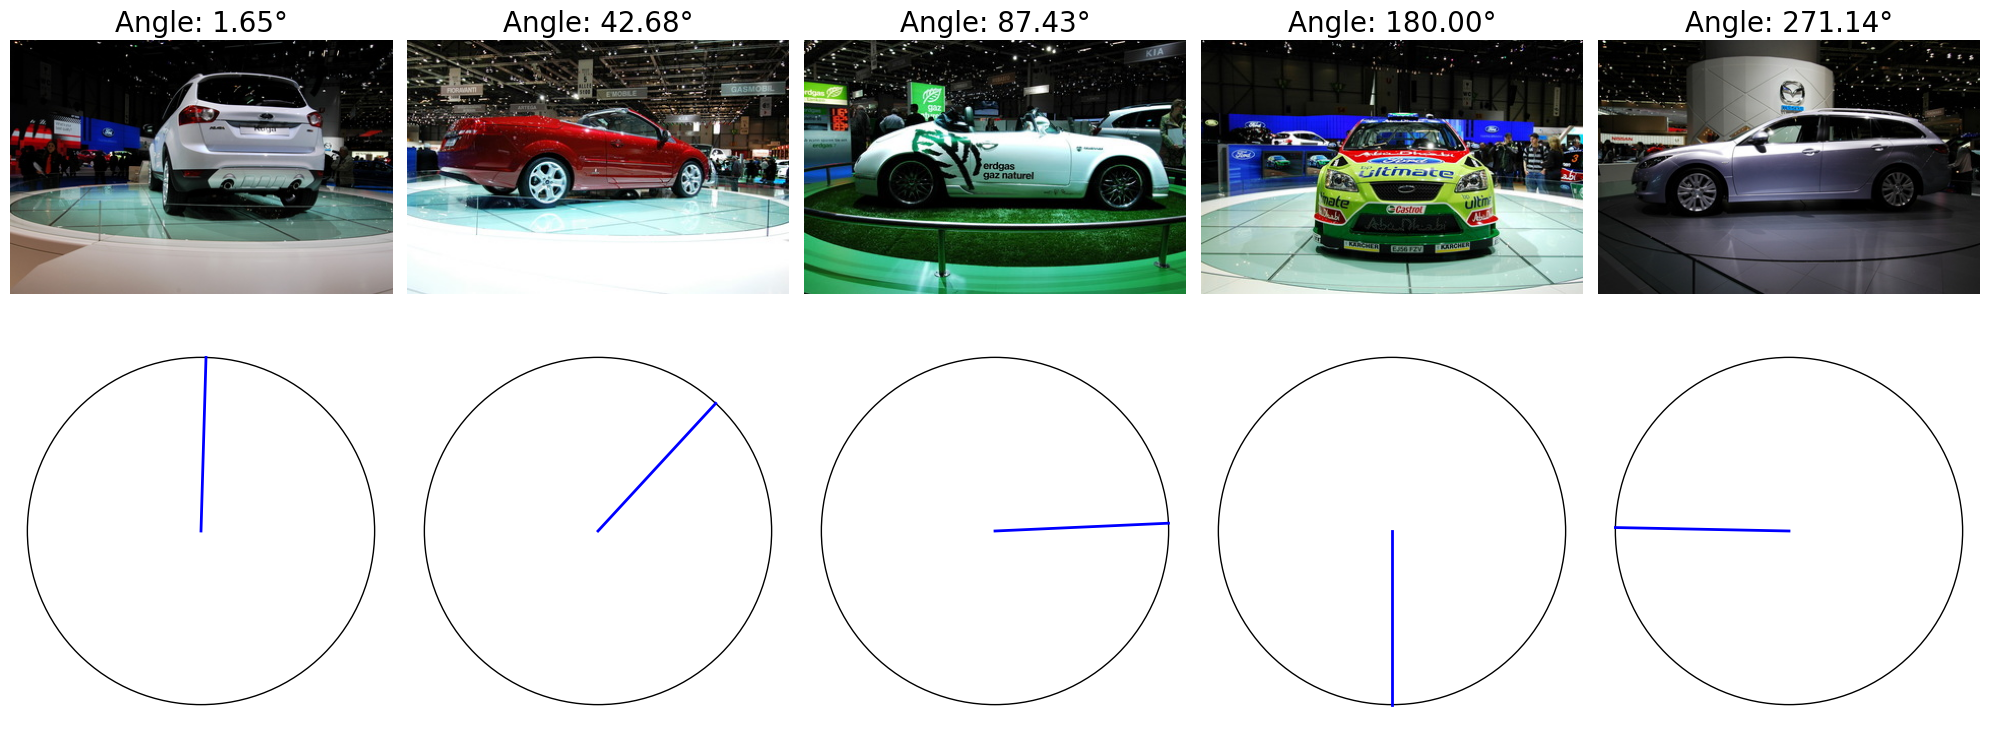

In [40]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#This cell is for you to select the specific car and the closest image to the input angle

def find_closest_frame_id(desired_angle, sequence_id, num_frames_360, frontal_frames, rotation_sense):
    sense = rotation_sense[sequence_id - 1]
    frames_for_360 = num_frames_360[sequence_id - 1]
    frontal_frame = frontal_frames[sequence_id - 1]

    if sense == 1:
        angle_offset = (desired_angle - 180) % 360
    else:
        angle_offset = (180 - desired_angle) % 360

    estimated_frame_id = int((angle_offset / 360) * frames_for_360) + frontal_frame
    estimated_frame_id = ((estimated_frame_id - 1) % frames_for_360) + 1  # Corrected

    return estimated_frame_id


def plot_cars_with_angles(base_path, sequence_ids, desired_angles):
    num_frames_360, frontal_frames, rotation_sense = parse_tripod_seq_info(base_path)
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # Create a figure with 1 row and 5 columns
    for i, (sequence_id, desired_angle) in enumerate(zip(sequence_ids, desired_angles)):
        frame_id = find_closest_frame_id(desired_angle, sequence_id, num_frames_360, frontal_frames, rotation_sense)
        actual_angle = calculate_angle(frame_id, sequence_id, num_frames_360, frontal_frames, rotation_sense)
        img_path = os.path.join(base_path, f'tripod_seq_{sequence_id:02d}_{frame_id:03d}.jpg')
        img = Image.open(img_path)
        axs[0, i].imshow(img)
        axs[0, i].set_title(f'Angle: {actual_angle:.2f}°', fontsize=20)  # Larger font size for the angle
        axs[0, i].axis('off')  # Hide the axes on the image plot
        plot_angle_circle(actual_angle, axs[1, i])
    plt.tight_layout()
    plt.show()

base_path = './data/epfl-gims08/tripod-seq'
sequence_ids = [1, 2, 3, 4, 5]  # Example sequence IDs for 5 cars
desired_angles = [2, 45, 90, 180, 270]  # Example desired angles for 5 cars

plot_cars_with_angles(base_path, sequence_ids, desired_angles)